In [47]:
# Data management
import pandas as pd

# Math and Stat modules
import numpy as np
from scipy.stats import sem
from random import choice

#Data preprocessing and trasformation (ETL)
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, FunctionTransformer, Binarizer, OneHotEncoder, OrdinalEncoder
from sklearn.compose import  ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

#Supervised Learning
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, StratifiedKFold, RepeatedKFold, ShuffleSplit, StratifiedShuffleSplit, learning_curve, validation_curve
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
#Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from matplotlib.pyplot import figure
from sklearn.metrics import accuracy_score

La sfida chiave contro la sua individuazione è come classificare i tumori in maligni (cancerosi) o benigni (non cancerosi). 
Ti chiediamo di completare l'analisi della classificazione di questi tumori utilizzando l'apprendimento automatico (con SVM) e il set di dati (diagnostico) del cancro al seno del Wisconsin.

## 1.1 STEP 1: ETL PROCESSING

In [2]:
breast_dataset = pd.read_csv('OneDrive/Documenti/GitHub/MDS-python/Marcello Brambilla/breast-cancer.csv')

In [3]:
breast_dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
breast_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
breast_label = breast_dataset['diagnosis'].map(
    {'B':0,
     'M':1
    }
).values
breast_dataset.drop(columns=['id','diagnosis'], inplace = True)

In [6]:
breast_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [7]:
data_preprocessing = ColumnTransformer([
    ('scaler',StandardScaler(), ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst'])
    ],
    remainder = 'passthrough'
)

In [8]:
feature_matrix = data_preprocessing.fit_transform(breast_dataset)

In [9]:
fm = pd.DataFrame(feature_matrix)
fm

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


## 1.2 STEP 2: TRAINING E TEST SETS
dividiamo il dataset in training e test sets in modo tale che il test set contenga il 20% dei record.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, breast_label, test_size = 0.2, random_state = 42)

## 1.3 STEP 3: LA SCELTA DEGLI ALGORITMI/MODELLI DA UTILIZZARE
-Perceptron
-LogisticRegression
-Support Vector Machine

## 1.3.1 PERCEPTRON

In [11]:
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(feature_matrix, breast_label, test_size = 0.2)
    perceptron = Perceptron()
    perceptron.fit(X_train, y_train) # apprendo su training
    predicted_test = perceptron.predict(X_test) # predico sul test
    print(np.sum(predicted_test == y_test)/len(y_test))

0.956140350877193
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9912280701754386
0.9912280701754386
0.956140350877193
0.9912280701754386
0.9385964912280702
0.9649122807017544


## STEP 4: cross-validation

Utilizzanod 5-fold cross-validation devo valutare le performance dei diversi modelli (la scelta degli iperparametri per ora non e' vincolata). Nel dettaglio si devono utilizzare come misure di performance:
- accuracy
- precision
- recall 
- f1-score

Per ogni modello si deve costruire la distribuzione della misura di performance (un box plot e' sufficiente), oppure calcolare media e deviazione standard.

 1.4.1 A.PERCETTRONE

In [12]:
p = Perceptron()
cvs = cross_val_score(p, X_train, y_train, cv = 5)

In [13]:
cvs

array([0.95604396, 0.92307692, 0.98901099, 0.94505495, 0.94505495])

In [14]:
np.mean(cvs)

0.9516483516483516

In [15]:
np.std(cvs)

0.02153397576073124

{'whiskers': [<matplotlib.lines.Line2D at 0x2878f588670>,
 'caps': [<matplotlib.lines.Line2D at 0x2878f588cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2878f588220>],
 'medians': [<matplotlib.lines.Line2D at 0x2878f59a430>],
 'fliers': [<matplotlib.lines.Line2D at 0x2878f59a7c0>],
 'means': []}

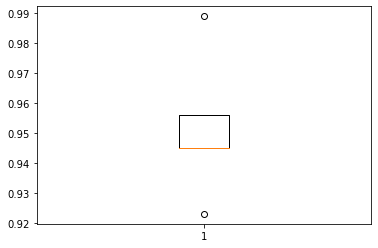

In [16]:
plt.boxplot(cvs)

In [17]:
y_train_predicted = cross_val_predict(p, X_train, y_train, cv = 5)

In [18]:
as1 = accuracy_score(y_train, y_train_predicted, normalize=True)
as1

0.9516483516483516

In [19]:
confusion_matrix(y_train, y_train_predicted)

array([[269,  17],
       [  5, 164]], dtype=int64)

In [20]:
precision_score(y_train, y_train_predicted)

0.9060773480662984

In [21]:
recall_score(y_train, y_train_predicted)

0.9704142011834319

In [22]:
f1_score(y_train, y_train_predicted)

0.9371428571428572

## Logistic Regression

In [23]:
logit_cls = LogisticRegression(max_iter = 1000)
y_scores = cross_val_predict(logit_cls, X_train, y_train, cv = 5)

In [24]:
cvs_log = cross_val_score(logit_cls, X_train, y_train, cv = 5)

In [25]:
cvs_log

array([0.97802198, 0.95604396, 1.        , 0.95604396, 0.98901099])

In [26]:
prec, recall, soglia = precision_recall_curve(y_train, y_scores)

In [27]:
precision_score(y_train, y_scores), recall_score(y_train, y_scores), f1_score(y_train, y_scores)

(0.9817073170731707, 0.9526627218934911, 0.9669669669669669)

In [28]:
# Metodo alternativo per il calcolo degli score
logit_cls.fit(X_train, y_train)
y_scores_alternative = logit_cls.decision_function(X_train)

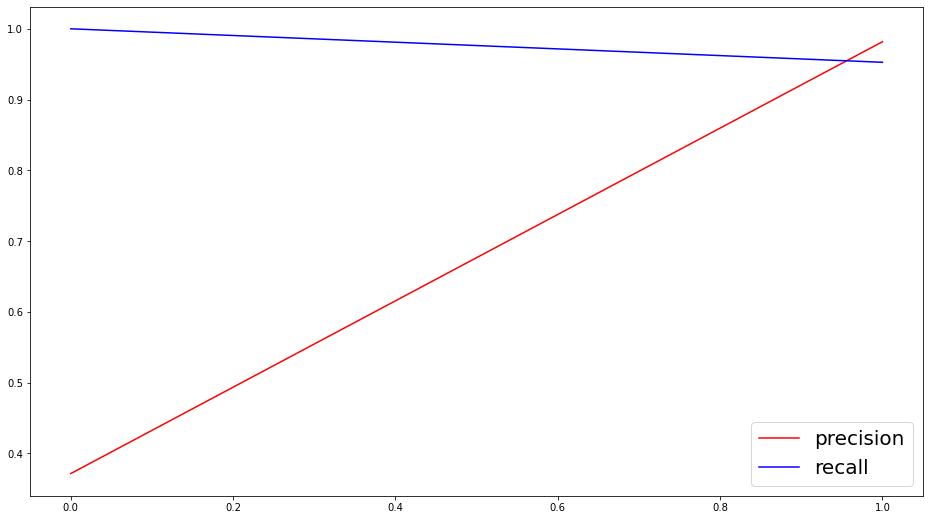

In [29]:
fig_prc = plt.figure(figsize=(16,9))
ax = fig_prc.add_subplot()
ax.plot(soglia, prec[:-1], 'r', label = 'precision')
ax.plot(soglia, recall[:-1], 'b', label = 'recall')
ax.legend(fontsize=20)

Oppure posso visualizzare la precision in funzione della recall

Text(0, 0.5, 'Precision')

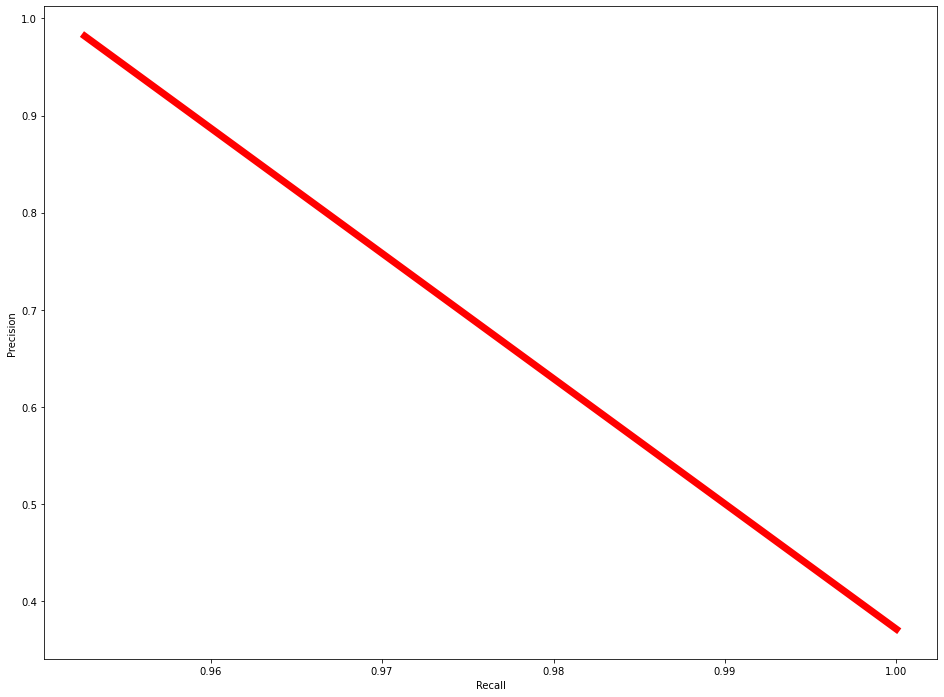

In [30]:
fig_prf = plt.figure(figsize=(16,12))
ax = fig_prf.add_subplot()
ax.plot(recall[:-1], prec[:-1], 'r', label = 'precision', lw = 7)
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")

#### 6.1 Learning curve

In [31]:
train_sizes, train_scores, test_scores = learning_curve(logit_cls,
                                                       X=feature_matrix,
                                                       y=breast_label,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = 5,
                                                       n_jobs = -1,
                                                       shuffle = True)

(0.6, 1.03)

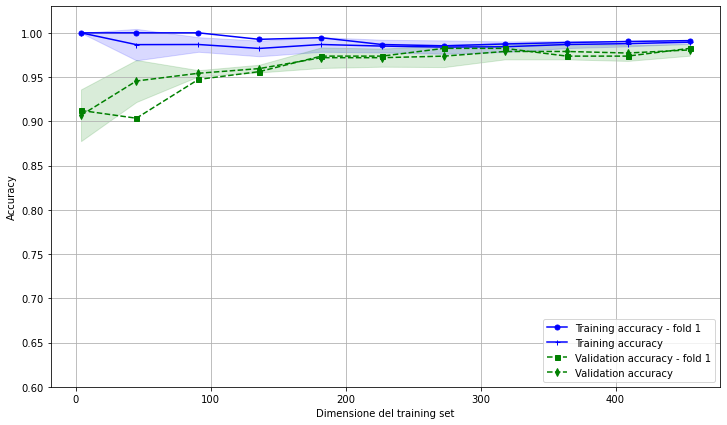

In [32]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()
ax.plot(train_sizes, train_scores[:,0],
         color='blue', marker='o',
         markersize=5, label='Training accuracy - fold 1')

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(train_sizes, test_scores[:,0],
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy - fold 1')

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation accuracy')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Dimensione del training set')
ax.set_ylabel('Accuracy')
ax.legend(loc='lower right')
ax.set_ylim([0.6, 1.03])

## SUPPORT VECTOR MACHINE (SVM)

In [33]:
np.linspace(0,1,10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

Training SVM per C = 0.01 0
Training per 0.01 finito
Training SVM per C = 0.1 1
Training per 0.1 finito
Training SVM per C = 1 2
Training per 1 finito
Training SVM per C = 10 3
Training per 10 finito
Training SVM per C = 100 4
Training per 100 finito


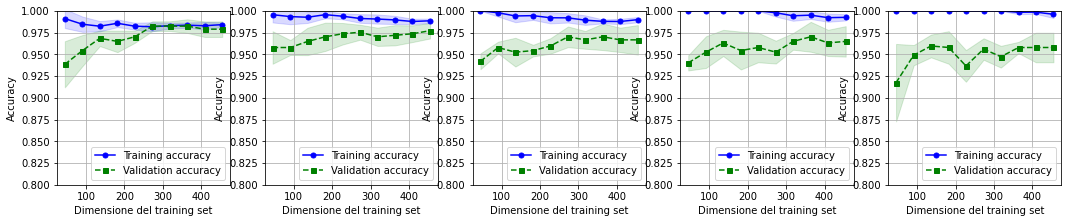

In [36]:
Cs = [0.01, 0.1, 1, 10, 100]# definire un insieme di valori di C tenendo in considerazione le precedenti osservazioni sul suo effetto 
fig = plt.figure(figsize=(18,3.2))
for i, c in enumerate(Cs):
    print('Training SVM per C =', c, i)
    svm_cls = LinearSVC(C = c, max_iter=50000)
    train_sizes, train_scores, test_scores = learning_curve(svm_cls,
                                                       X=feature_matrix,
                                                       y=breast_label,
                                                       train_sizes=np.linspace(0.1,1,10),
                                                       cv = 5, n_jobs=-1,
                                                       shuffle = True)
    

    print('Training per {} finito'.format(c))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    ax = fig.add_subplot(150+(i+1))
    ax.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
    ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
    ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
    ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.8,1))
    ax.set_xlabel('Dimensione del training set')
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')

## DECISION TREE

In [39]:
min_leaf = [5, 10, 100, 200, 350]

train_sizes, train_means, test_means, test_stds, train_stds = [],[],[],[],[]
for mlf in min_leaf:
    dt_mlf = DecisionTreeClassifier(min_samples_leaf=mlf, random_state=42, max_depth=15)
    train_size, train_scores, test_scores = learning_curve(dt_mlf,
                                                       X=feature_matrix,
                                                       y=breast_label,
                                                       train_sizes=np.linspace(0.1,1.0,10),
                                                       cv=5,
                                                       n_jobs=-1)
    print('fatto {}'.format(mlf))
    train_means.append(np.mean(train_scores, axis=1))
    train_stds.append(np.std(train_scores, axis=1))
    test_means.append(np.mean(test_scores, axis=1))
    test_stds.append(np.std(test_scores, axis=1))
    train_sizes.append(train_size)

fatto 5
fatto 10
fatto 100
fatto 200
fatto 350


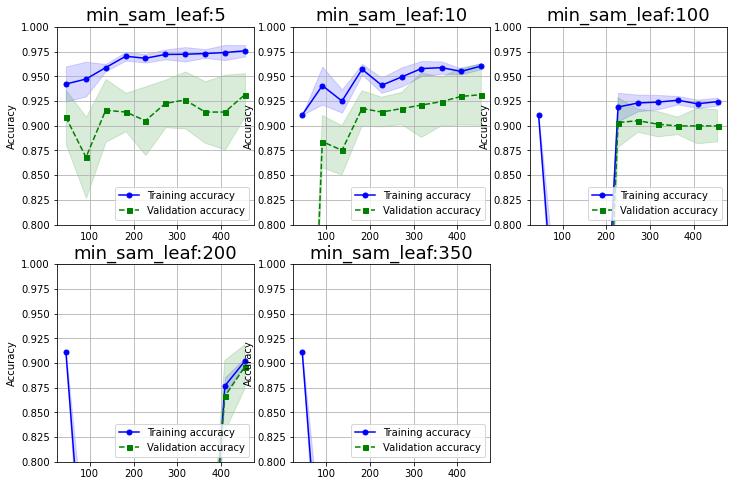

In [40]:
fig= plt.figure(figsize=(12, 8))
for i in range(5):
    ax = fig.add_subplot(231+i)
    ax.plot(train_sizes[i], train_means[i],
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
    ax.fill_between(train_sizes[i],
                 train_means[i] + train_stds[i],
                 train_means[i] - train_stds[i],
                 alpha=0.15, color='blue')
    ax.plot(train_sizes[i], test_means[i],
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
    ax.fill_between(train_sizes[i],
                 test_means[i] + test_stds[i],
                 test_means[i] - test_stds[i],
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.8,1))
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')
    ax.set_title(r"min_sam_leaf:{}".format(min_leaf[i]), fontsize=18)

## Random Forest

In [43]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, breast_label, test_size=0.2, stratify=breast_label)

In [44]:
len(y_train[y_train == 1])/len(y_train), len(y_test[y_test == 1])/len(y_test)

(0.37362637362637363, 0.3684210526315789)

In [48]:
rnf_clf = RandomForestClassifier(n_estimators=250, max_leaf_nodes=64, n_jobs=-1, max_features=10)
et_clf = ExtraTreesClassifier(n_estimators=250, max_leaf_nodes=64, n_jobs=-1, max_features=10)
scores_rnf = cross_val_score(rnf_clf, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
scores_et = cross_val_score(et_clf, X_train, y_train, cv=5, scoring='f1',n_jobs=-1)

In [51]:
rnf_clf.fit(feature_matrix,breast_label)

RandomForestClassifier(max_features=10, max_leaf_nodes=64, n_estimators=250,
                       n_jobs=-1)

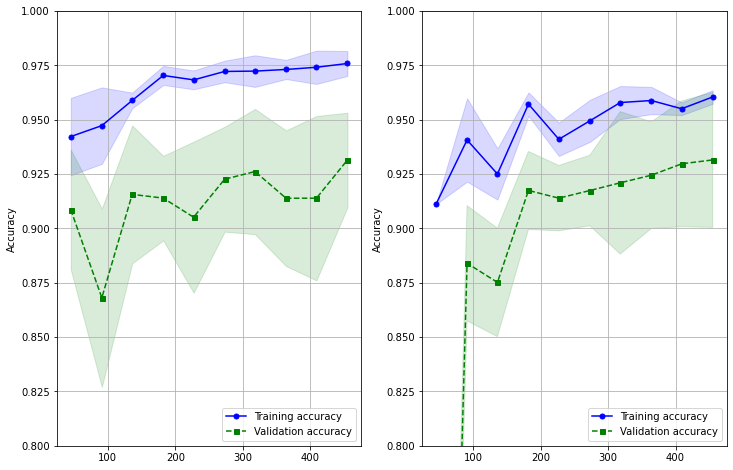

In [53]:
fig= plt.figure(figsize=(12, 8))
for i in range(2):
    ax = fig.add_subplot(121+i)
    ax.plot(train_sizes[i], train_means[i],
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
    ax.fill_between(train_sizes[i],
                 train_means[i] + train_stds[i],
                 train_means[i] - train_stds[i],
                 alpha=0.15, color='blue')
    ax.plot(train_sizes[i], test_means[i],
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
    ax.fill_between(train_sizes[i],
                 test_means[i] + test_stds[i],
                 test_means[i] - test_stds[i],
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.8,1))
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')